No handles with labels found to put in legend.


Promedio clientes en cola: 0.49969630656438196
Promedio clientes en sistema: 1.0037128537627926
Uso del servidor: 0.5040165471984104
Tiempo promedio en cola: 1.0148866270521046
Tiempo promedio en sistema: 2.0258706829228905


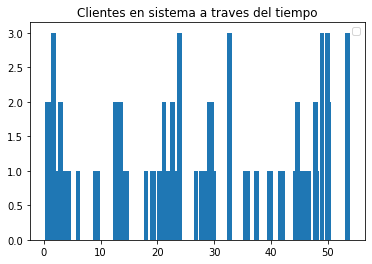

No handles with labels found to put in legend.


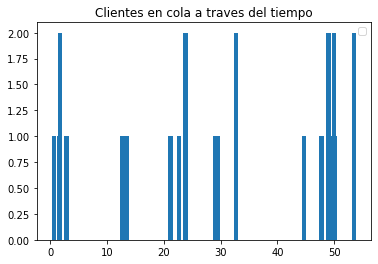

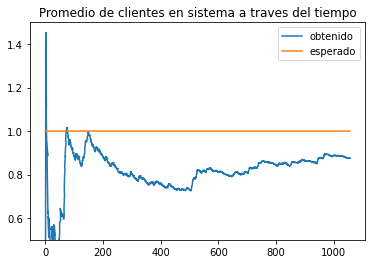

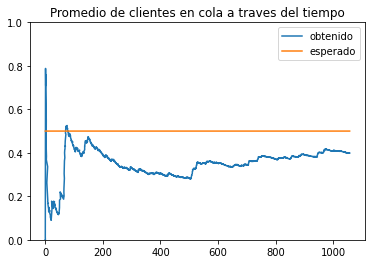

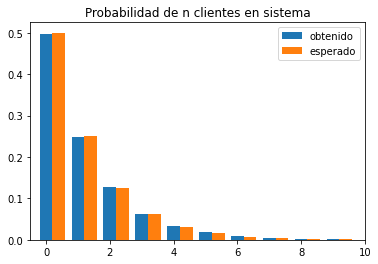

In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt




tiempo = 0
estado_servicio = 0
cantidad_cola = 0
limite_cola = 1000
tiempo_prox_evento = [0,0]
n_clientes_atrasados = 0
total_delays = 0
area_cola = 0
area_estado = 0
tasa_arrivo =1
tasa_servicio = 0.5
max_tiempo = 10000
num_events = 1
tiempos_arrivos = [0] * 2000000
delay = 0
tiempo_ultimo_evento = 0
next_event_type = 0
area_sistema = 0
cliente_sistema = 0
llegadas = []
salidas = []
clientes_sistema = []
clientes_cola = []
clientes_sistema_tiempo = []
clientes_cola_tiempo = []
tiempos = []
area_clientes = [0] * 10000 



def inicio():
    global tiempo_prox_evento
    global tasa_arrivo
    global max_tiempo
    tiempo_prox_evento[0] = tiempo - tasa_arrivo * np.log(random.random())

    llegadas.append(tiempo_prox_evento[0])
    tiempo_prox_evento[1] = max_tiempo + 1


def timing():
    global max_tiempo
    global num_events
    global next_event_type
    global tiempo
    global tiempo_prox_evento
    i = 0
    min_time_next_event = max_tiempo + 1
    next_event_type = 0
    if (tiempo_prox_evento[0] < tiempo_prox_evento[1]):
        min_time_next_event = tiempo_prox_evento[0]
        next_event_type = 0
    else:
        min_time_next_event = tiempo_prox_evento[1]
        next_event_type = 1
    """
    for i in range(0,num_events):
        if (tiempo_prox_evento[i] < min_time_next_event):
            min_time_next_event = tiempo_prox_evento[i]
            next_event_type = i
    """
    tiempo = min_time_next_event
    

def arrive():
    global tiempo_prox_evento
    global tiempo
    global tasa_arrivo
    global cantidad_cola
    global estado_servicio
    global limite_cola
    global total_delays
    global tiempos_arrivos
    global n_clientes_atrasados
    global tasa_servicio
    global cliente_sistema
    global llegadas
    global tiempos
    delay = 0
    tiempo_prox_evento[0] = tiempo - tasa_arrivo * np.log(random.random())
    cliente_sistema = cliente_sistema + 1
    llegadas.append(tiempo_prox_evento[0])
    tiempos.append(tiempo_prox_evento[0])
    if (estado_servicio == 1):
        cantidad_cola = cantidad_cola + 1
        if(cantidad_cola > limite_cola):
            hola = 10
        tiempos_arrivos[cantidad_cola] = tiempo
    else:
        delay = 0.0
        total_delays = total_delays + delay
        n_clientes_atrasados = n_clientes_atrasados + 1
        estado_servicio = 1
        tiempo_prox_evento[1] = tiempo - tasa_servicio * np.log(random.random())
        salidas.append(tiempo_prox_evento[1])
        tiempos.append(tiempo_prox_evento[1])
        

def depart():
    global tiempo
    global cantidad_cola
    global estado_servicio
    global tiempo_prox_evento
    global max_tiempo
    global delay
    global total_delays
    global tiempos_arrivos
    global tasa_servicio
    global n_clientes_atrasados
    global cliente_sistema
    global salidas
    global tiempos
    i = 0
    cliente_sistema = cliente_sistema - 1
    delay = 0.0
    if(cantidad_cola == 0):
        estado_servicio = 0
        tiempo_prox_evento[1] = max_tiempo + 1
    else:
        cantidad_cola = cantidad_cola - 1
        delay = tiempo - tiempos_arrivos[1]
        total_delays = total_delays + delay
        n_clientes_atrasados = n_clientes_atrasados + 1
        tiempo_prox_evento[1] = tiempo - tasa_servicio * np.log(random.random())
        salidas.append(tiempo_prox_evento[1])
        tiempos.append(tiempo_prox_evento[1])
        for i in range(1, cantidad_cola-1):
            tiempos_arrivos[i] = tiempos_arrivos[i+1]
    


def update():
    global area_cola
    global area_estado
    global tiempo
    global tiempo_ultimo_evento
    global cantidad_cola
    global estado_servicio
    global area_sistema
    global cliente_sistema
    global clientes_sistema
    global clientes_cola
    global clientes_sistema_tiempo
    global clientes_cola_tiempo


    tiempo_desde_ultimo_evento = tiempo - tiempo_ultimo_evento
    tiempo_ultimo_evento = tiempo
    area_cola = area_cola + cantidad_cola * tiempo_desde_ultimo_evento
    clientes_cola.append(cantidad_cola)
    clientes_cola_tiempo.append(area_cola/tiempo)
    area_sistema= area_sistema + cliente_sistema * tiempo_desde_ultimo_evento
    clientes_sistema.append(cliente_sistema)
    clientes_sistema_tiempo.append(area_sistema/tiempo)
    area_estado = area_estado + estado_servicio * tiempo_desde_ultimo_evento
    area_clientes[cliente_sistema] = area_clientes[cliente_sistema] + tiempo_desde_ultimo_evento
    




def main():
    global num_events
    global tiempo
    global max_tiempo
    global next_event_type
    global n_clientes_atrasados

    i= 0
    j= 0

    inicio()
    while(tiempo < max_tiempo):
        timing()
        update()
        if(next_event_type == 0):
            arrive()
            i = i + 1
        else:
            depart()
            j = j +1
    
    
main()
print("Promedio clientes en cola: ", end="")
print(area_cola/tiempo)
print("Promedio clientes en sistema: ", end="")
print(area_sistema/tiempo)
print("Uso del servidor: ", end="")
print(area_estado/tiempo)

x = 0
for i in range(len(salidas)-1):
    x = x + salidas[i] - llegadas[i]

print("Tiempo promedio en cola: ", end="")
print(x/ len(salidas))

x = 0
for i in range(len(salidas)- 2):
    x = x + salidas[i+1] - llegadas[i]

print("Tiempo promedio en sistema: ", end="")
print(x/ len(salidas))

plt.bar(tiempos[0:100], clientes_sistema[0:100])
plt.title("Clientes en sistema a traves del tiempo")

plt.legend()
plt.show()

plt.bar(tiempos[0:100], clientes_cola[0:100])
plt.title("Clientes en cola a traves del tiempo")

plt.legend()
plt.show()

plt.plot(tiempos[0:2000], clientes_sistema_tiempo[0:2000], label="obtenido")
plt.title("Promedio de clientes en sistema a traves del tiempo")
plt.plot(tiempos[0:2000], [1] * 2000, label="esperado")

plt.legend()
plt.ylim(0.5,1.5)
plt.show()

plt.plot(tiempos[0:2000], clientes_cola_tiempo[0:2000], label="obtenido")
plt.title("Promedio de clientes en cola a traves del tiempo")
plt.plot(tiempos[0:2000], [1/2] * 2000, label="esperado")

plt.legend()
plt.ylim(0,1)
plt.show()

esperado = [0] * len(area_clientes)
for i in range(len(area_clientes)):
  esperado[i] = np.power(tasa_servicio/tasa_arrivo, i) * (1 - tasa_servicio/tasa_arrivo)

x = list(range(len(esperado)))
for i in range(len(esperado) - 1):
  x[i] = x[i] + 0.4

plt.bar(range(len(area_clientes))[0:10], (area_clientes/tiempo)[0:10], label="obtenido", width=0.4)
plt.bar(x[0:10], (esperado)[0:10], label="esperado", width=0.4)
plt.legend()
plt.title("Probabilidad de n clientes en sistema")
plt.xlim(-0.5,10)
plt.show()











